In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from yahoo_finance import Share
%matplotlib inline

In [3]:
#getting the data from yahoo
google = Share('GOOGL')
google = google.get_historical('2011-04-25', '2014-04-29')

In [74]:
#converting the data to a pandas dataframe
g_df = pd.DataFrame(google)
g_df.head(5)

,Adj_Close,Close,Date,High,Low,Open,Symbol,Volume
0,536.330017,536.330017,2014-04-29,537.76001,523.00,523.890015,GOOGL,2535200
1,522.97998,522.97998,2014-04-28,525.900024,511.00,525.799988,GOOGL,3752800
2,523.099976,523.099976,2014-04-25,533.859985,522.50,532.26001,GOOGL,2370000
3,534.440002,534.440002,2014-04-24,542.50,531.00,541.690002,GOOGL,2067400
4,537.51001,537.51001,2014-04-23,544.799988,528.130005,543.669983,GOOGL,1955700


In [75]:
#droping unwanted cols
g_df.drop(['Symbol','Adj_Close',],axis=1,inplace=True)

In [80]:
def set_types(df):
    for i in df.columns:
        if i == 'Date':
            pass
        else:
            df[i] = df[i].astype('float')

In [81]:
set_types(g_df)

In [84]:
g_df.dtypes

Close     float64
Date       object
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object

In [87]:
#making moving_avg 
g_df['sma_5'] = g_df['Close'].rolling(5).mean()
g_df['sma_20'] = g_df['Close'].rolling(20).mean()

In [91]:
g_df.dropna(inplace=True)

In [92]:
g_df['next_close'] = g_df['Close'].shift(1)

In [94]:
g_df.dropna(inplace=True)

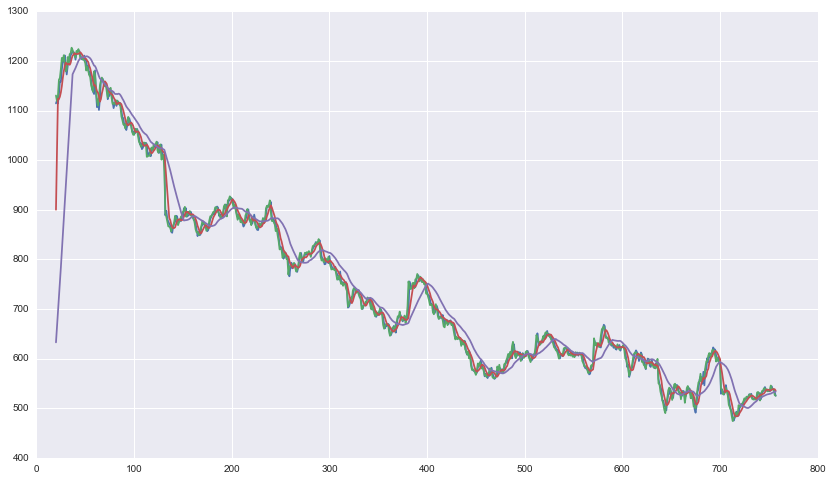

In [100]:
plt.figure(figsize=(14,8))
plt.plot(g_df['Close'])
plt.plot(g_df['Open'])
plt.plot(g_df['sma_5'])
plt.plot(g_df['sma_20'])

# ML

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
g_df.head(5)

,Close,Date,High,Low,Open,Volume,sma_5,sma_20,next_close
20,1114.509999,2014-03-31,1134.999987,1112.850040,1130.399977,3880700.0,900.249995,632.746001,1134.889990
21,1120.149983,2014-03-28,1133.190031,1117.770042,1119.000011,4513200.0,1015.229991,662.604501,1114.509999
22,1114.280005,2014-03-27,1131.940062,1102.100058,1130.849966,7636700.0,1123.785992,692.163502,1120.149983
23,1131.970061,2014-03-26,1171.570070,1131.500072,1162.010060,5154800.0,1123.160008,722.040005,1114.280005
24,1158.720018,2014-03-25,1169.839990,1147.000060,1165.999962,4815500.0,1127.926013,753.100506,1131.970061


In [103]:
X = g_df[['Close','sma_5','sma_20','Volume']]

y = g_df['next_close']

In [120]:


def cand_logic(body):
    if body > 0:
        return 1
    else:
        return 0

g_df['state'] = g_df.body.apply(cand_logic)

In [121]:
g_df['n_state'] = g_df['state'].shift(1)

In [122]:
g_df.dropna(inplace=True)

In [123]:
g_df['sma_5'] = g_df['body'].rolling(5).mean()
g_df['sma_20'] = g_df['body'].rolling(20).mean()

In [124]:
g_df.dropna(inplace=True)

In [125]:
g_df.shape

(718, 12)

In [130]:
g_df.n_state = g_df.n_state.astype('int')

In [135]:
g_df.body.std()

8.085957014626864

In [136]:
X = g_df[['state','Volume','sma_5','sma_20']]
y = g_df.n_state

In [138]:
from sklearn.svm import SVC
svc_clf = SVC()
cv_scores = cross_val_score(svc_clf , X , y,cv=10)
cv_scores.mean()

0.4958333333333334

In [139]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=3)
cv_scores = cross_val_score(tree_clf , X , y,cv=5)

In [140]:
cv_scores.mean()

0.55420579029733963

In [141]:
cv_scores

array([ 0.56944444,  0.54861111,  0.56944444,  0.56944444,  0.51408451])

In [143]:
from sklearn.ensemble import AdaBoostClassifier as adab

In [144]:
ada = adab(n_estimators=400)

In [146]:
cv_scores = cross_val_score(ada , X , y,cv=10)

In [147]:
cv_scores.mean()

0.58083333333333331